# EDA

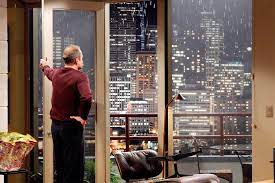

In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [11]:
df = pd.read_csv("data/market_info.csv", sep= ",")
df.head()

,date,price,house_id,id,id.1,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.000,7129300520,1,7129300520,3.000,1.000,1180.000,5650.000,1.000,...,7,1180.000,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000
1,2014-12-09,538000.000,6414100192,2,6414100192,3.000,2.250,2570.000,7242.000,2.000,...,7,2170.000,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000
2,2015-02-25,180000.000,5631500400,3,5631500400,2.000,1.000,770.000,10000.000,1.000,...,6,770.000,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000
3,2014-12-09,604000.000,2487200875,4,2487200875,4.000,3.000,1960.000,5000.000,1.000,...,7,1050.000,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000
4,2015-02-18,510000.000,1954400510,5,1954400510,3.000,2.000,1680.000,8080.000,1.000,...,8,1680.000,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000


In [13]:
df = df.drop('id.1', axis=1)

KeyError: "['id.1'] not found in axis"

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   house_id       21597 non-null  int64  
 3   id             21597 non-null  int64  
 4   bedrooms       21597 non-null  float64
 5   bathrooms      21597 non-null  float64
 6   sqft_living    21597 non-null  float64
 7   sqft_lot       21597 non-null  float64
 8   floors         21597 non-null  float64
 9   waterfront     19206 non-null  float64
 10  view           21534 non-null  float64
 11  condition      21597 non-null  int64  
 12  grade          21597 non-null  int64  
 13  sqft_above     21597 non-null  float64
 14  sqft_basement  21145 non-null  float64
 15  yr_built       21597 non-null  int64  
 16  yr_renovated   17749 non-null  float64
 17  zipcode        21597 non-null  int64  
 18  lat   

In [23]:
# Store the key continuous variables (numerical features) in an object 
# (Took out "latitude" and "longitude" as they are not necessary in this part of the analysis)
continuous_vars = [
    "price", "sqft_living", "sqft_lot", "sqft_above", "sqft_basement",
    "bathrooms", "bedrooms", "floors", "yr_built", "yr_renovated", "sqft_living15", "sqft_lot15"
]


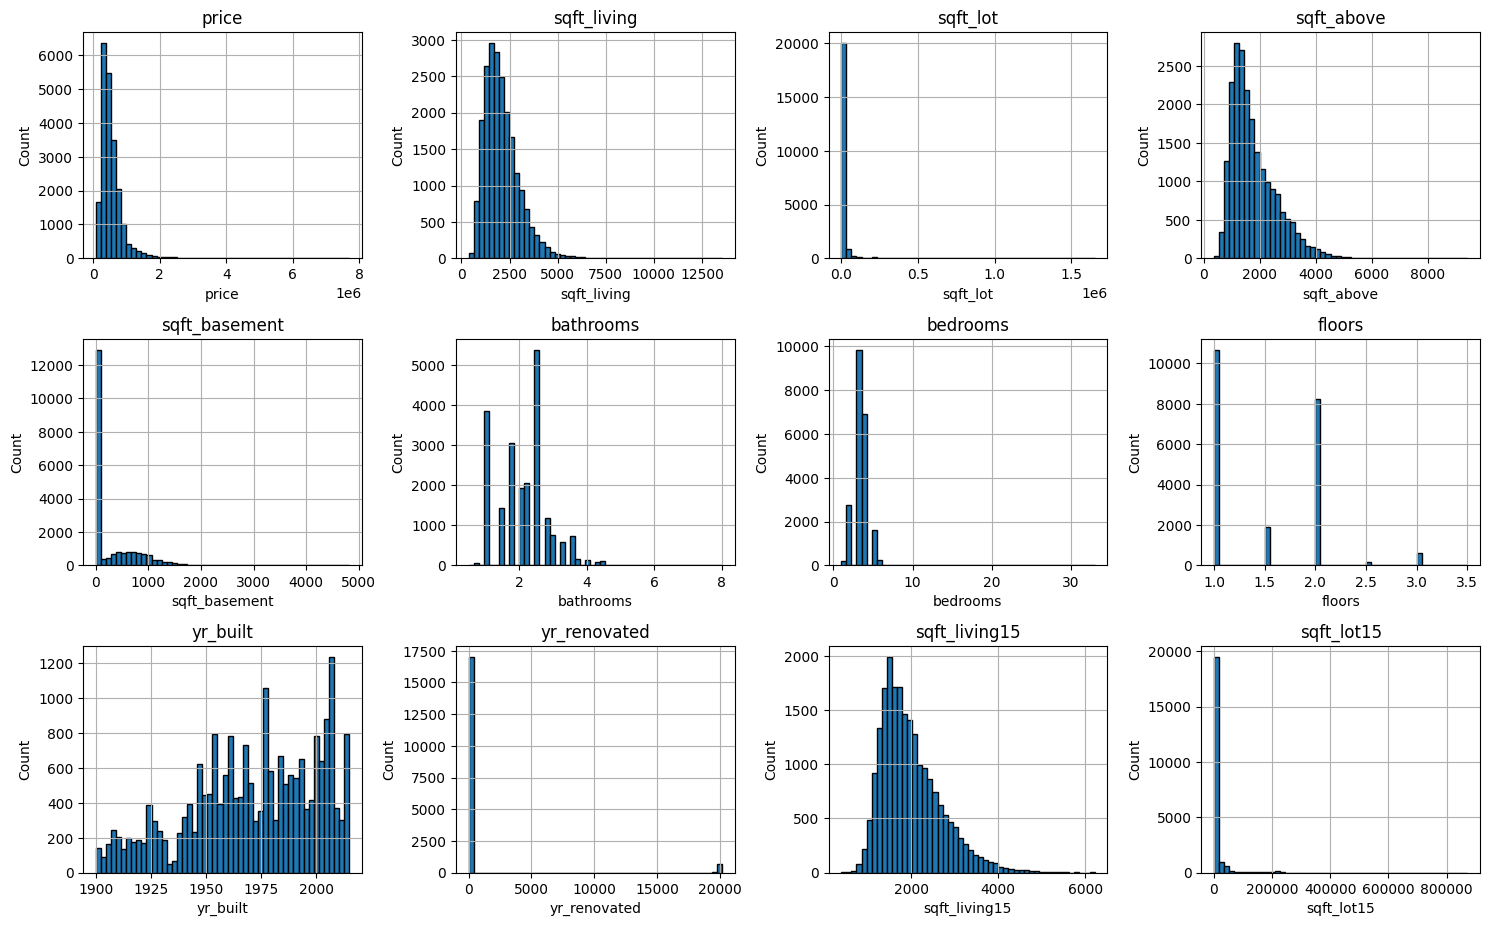

In [24]:
# Check distributions of the continuous variables and to see if there are any outliers 

plt.figure(figsize=(15, 12))  # Adjust figure size

for i, col in enumerate(continuous_vars, 1):  # Loop through columns
    plt.subplot(4, 4, i)  # Create subplots in a 4x4 grid
    df[col].hist(bins=50, edgecolor="black")  # Create histogram
    plt.title(col)  # Set title
    plt.xlabel(col)  # Label x-axis
    plt.ylabel("Count")  # Label y-axis

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show() 


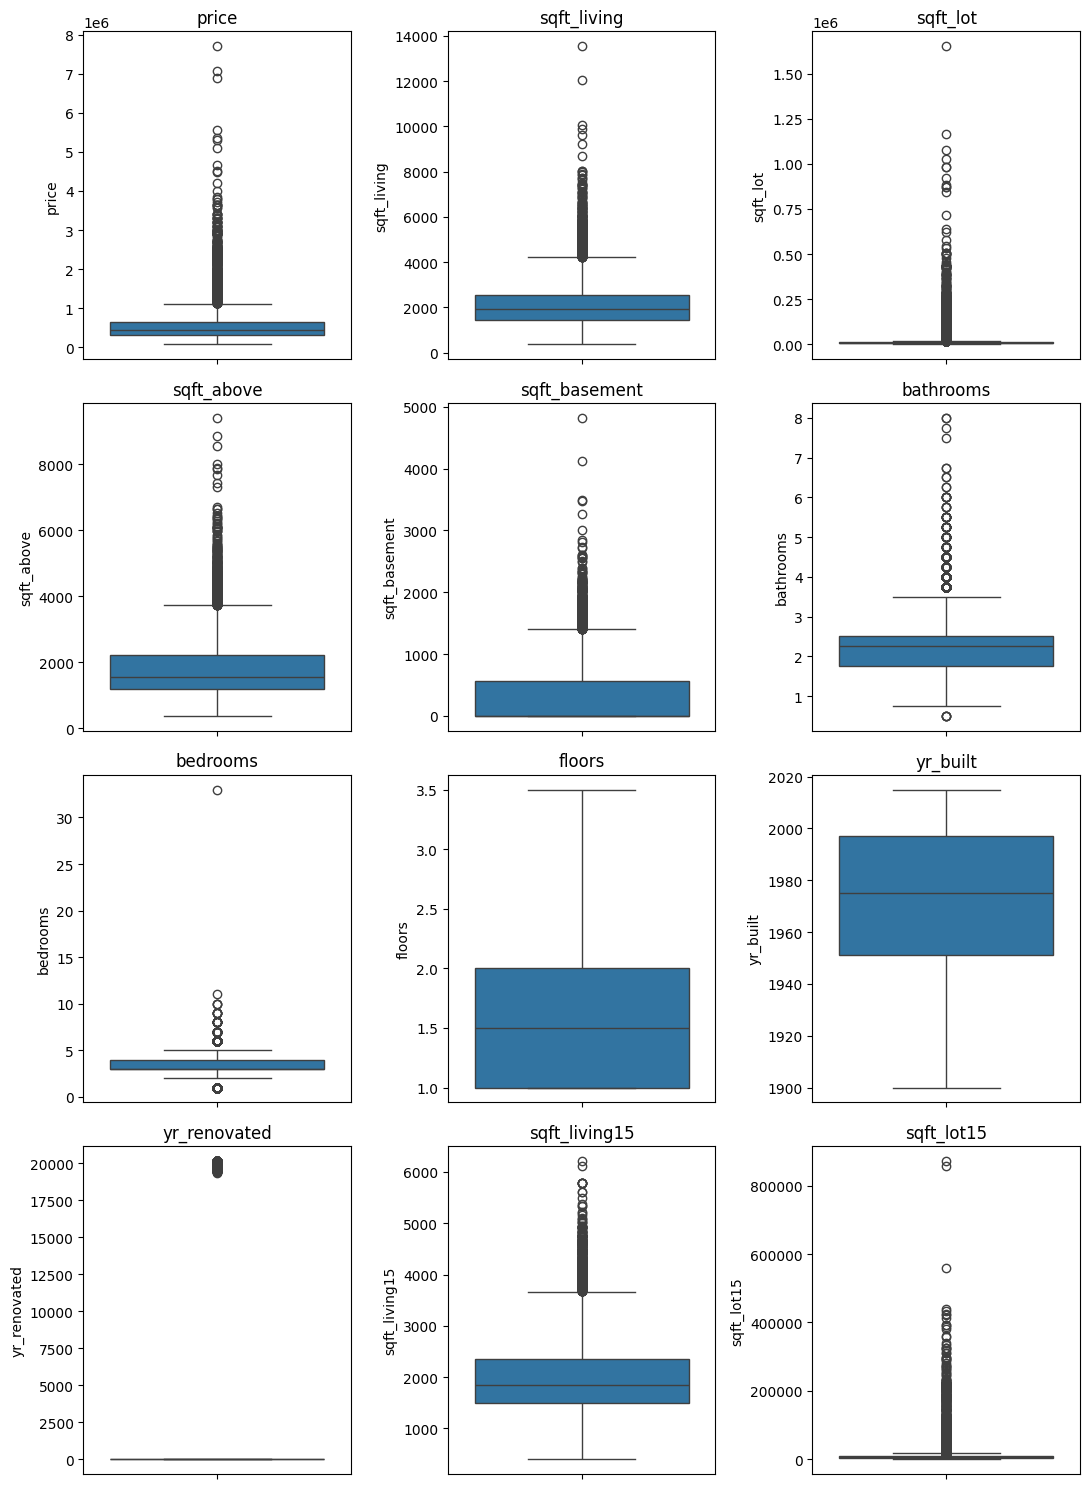

In [33]:
# Use boxplot to check for outliers

# Set plot size
plt.figure(figsize=(11, 15))

# Create boxplots for each variable
for i, col in enumerate(continuous_vars, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [29]:
# lots of outliers seens here, so I would like to detect them and see if they make sense.

In [28]:
# Function to detect outliers using IQR
def detect_outliers(df, columns):
    outlier_counts = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_counts[col] = len(outliers)
    return outlier_counts

# Detect outliers
outlier_summary = detect_outliers(df, continuous_vars)
outlier_summary


{'price': 1158,
 'sqft_living': 571,
 'sqft_lot': 2419,
 'sqft_above': 610,
 'sqft_basement': 484,
 'bathrooms': 561,
 'bedrooms': 530,
 'floors': 0,
 'yr_built': 0,
 'yr_renovated': 744,
 'sqft_living15': 543,
 'sqft_lot15': 2188}

In [35]:
## Evaluate Outliers

## Bedrooms (530) → one extreme outlier (probably an error), otherwise luxury homes have more than 10 bedrooms
## Price (1,158 outliers) → Luxury homes could distort trends.
## Sqft_lot (2,419 outliers) → Some properties have huge lots, possibly misleading analysis.
## Sqft_basement (484 outliers) → Some homes have large basements while most have none.
## Bathrooms (561 outliers) → Some homes have 6+ bathrooms, possibly unrealistic.
## Yr_renovated (744 outliers) → Many homes are never renovated (0 values).

# Based on these, I think the following should be removed:
    # Bedrooms > 10 (Likely incorrect or luxury estates)

In [40]:
outlier_row = df[df["bedrooms"] > 30]
outlier_row

,date,price,house_id,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sales_id
15856,2014-06-25,640000.000,2402100895,15857,33.000,1.750,1620.000,6000.000,1.000,0.000,...,1040.000,580.000,1947,0.000,98103,47.688,-122.331,1330.000,4700.000,15857
